In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
import stylecloud

In [4]:
style.use("seaborn")

In [5]:
url = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

In [6]:
df = pd.read_csv(url)
df

C:\Users\caisy\AppData\Local\Temp/ipykernel_82152/2348912207.py:1: DtypeWarning: Columns (12,14,18,21,24,29,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45000,E2915,suspected,Cross River,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
45001,E2916,suspected,Oyo,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
45002,E2917,suspected,Kano,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
45003,E2918,confirmed,Nasarawa,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-08-07,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19


In [7]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

In [8]:
print(df.Country.unique())
print("Number of countries: {}".format(len(df.Country.unique())))

['England' 'Portugal' 'Spain' 'United States' 'Canada' 'Sweden' 'Italy'
 'France' 'Belgium' 'Australia' 'Germany' 'Netherlands' 'Israel'
 'Switzerland' 'Greece' 'Austria' 'Argentina' 'Denmark' 'Morocco'
 'Slovenia' 'Scotland' 'Czech Republic' 'United Arab Emirates' 'Finland'
 'Wales' 'Northern Ireland' 'Sudan' 'Bolivia' 'Iran' 'Ecuador' 'Malta'
 'Ireland' 'Mexico' 'Pakistan' 'French Guiana' 'Thailand' 'Peru' 'Brazil'
 'Malaysia' 'Hungary' 'Norway' 'Paraguay' 'Costa Rica' 'Gibraltar'
 'Mauritius' 'Haiti' 'Uruguay' 'Latvia' 'Cayman Islands' 'Kosovo' 'Turkey'
 'Bahamas' 'Ghana' 'India' 'Iceland' 'Poland' 'Bangladesh' 'Uganda'
 'Cambodia' 'Malawi' 'Venezuela' 'Romania' 'Georgia' 'Slovakia'
 'Luxembourg' 'Nepal' 'Chile' 'Serbia' 'Lebanon' 'South Korea' 'Singapore'
 'South Africa' 'Taiwan' 'Colombia' 'Croatia' 'Bulgaria' 'Somalia'
 'Zambia' 'Fiji' 'Benin' 'Estonia' 'Puerto Rico' 'Panama'
 'Dominican Republic' 'Jamaica' 'New Zealand' 'Russia'
 'Bosnia And Herzegovina' 'Saudi Arabia' 'Martiniq

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Israel'),
  Text(13, 0,

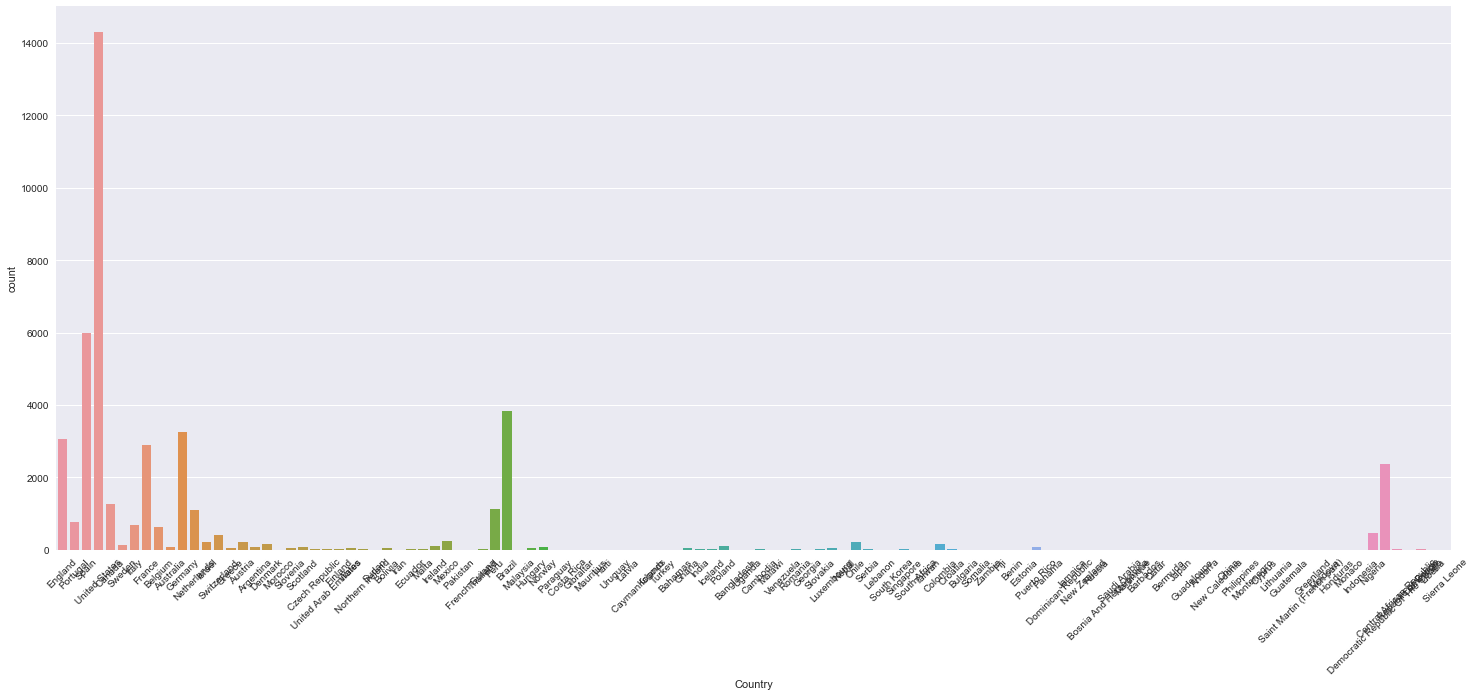

In [9]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Country", data = df)
plt.xticks(rotation = 45)

In [10]:
cases_per_country = df.groupby("Country")["Status"].count().nlargest(n = 10)
cases_per_country

Country
United States                       14293
Spain                                5978
Brazil                               3829
Germany                              3266
England                              3050
France                               2899
Democratic Republic Of The Congo     2380
Canada                               1263
Peru                                 1131
Netherlands                          1087
Name: Status, dtype: int64

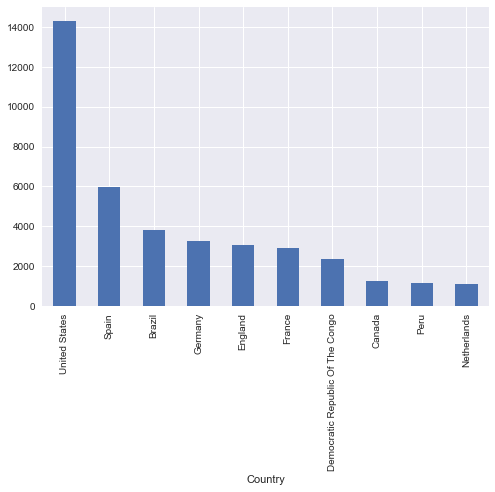

In [11]:
cases_per_country = df.groupby("Country", dropna = False)["Status"].count().nlargest(n = 10).plot(kind = "bar")

In [12]:
df[df.Country == "England"].groupby("City", dropna = False)["Status"].count()
# Many unknown cities have dicovered potential patients 

City
London           7
Newcastle        1
South East       1
NaN           3041
Name: Status, dtype: int64

In [13]:
df.City.value_counts()

Toronto          458
Madrid           121
Montreal          59
Berlin            48
Ottawa            41
                ... 
Washington DC      1
Trento             1
Challapata         1
Helsinki           1
Johannesburg       1
Name: City, Length: 193, dtype: int64

In [14]:
plt.figure(figsize= (20,20))
df.groupby("City")["Status"].count().nlargest(n = 10)

City
Toronto             458
Madrid              121
Montreal             59
Berlin               48
Ottawa               41
Lisbon               20
San Francisco        20
Gran Canaria         16
London-Middlesex     16
Malaga               16
Name: Status, dtype: int64

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='Status', ylabel='count'>

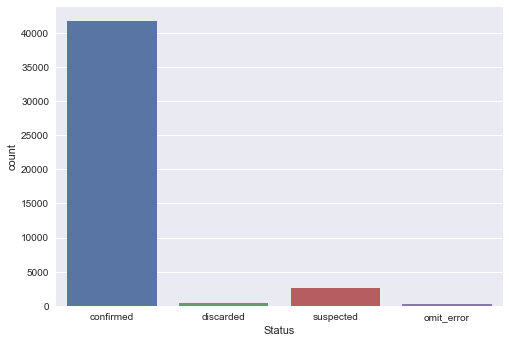

In [15]:
sns.countplot(x = "Status", data = df)

In [16]:
df.groupby(["Status", "Country"]).count()

ID  Location  City  Country_ISO3  Age  Gender  \
Status    Country                                                     
confirmed Andorra      4         0     0             4    0       0   
          Argentina   72         7     4            72   21      42   
          Australia   90        90     7            90    7       8   
          Austria    217         2     9           217    8       7   
          Barbados     1         0     0             1    1       1   
...                  ...       ...   ...           ...  ...     ...   
suspected Somalia      3         3     3             3    0       0   
          Sudan        1         0     0             1    0       0   
          Uganda       6         6     0             6    2       1   
          Uruguay      1         0     0             1    0       0   
          Zambia       1         0     0             1    1       1   

                     Date_onset  Date_confirmation  Symptoms  \
Status    Country                                              
confirmed Andorra             0                  4         0   
          Argentina          12                 72         8   
          Australia           1                 90         1   
          Austria             0                217         2   
          Barbados            0                  1         1   
...                         ...                ...       ...   
suspected Somalia             0                  0         0   
          Sudan               0                  0         0   
          Uganda              0                  0         0   
          Uruguay             0                  0         0   
          Zambia              0                  0         0   

                     Hospitalised (Y/N/NA)  ...  Source  Source_II  \
Status    Country                           ...                      
confirmed Andorra                        0  ...       4          3   
          Argentina                      0  ...      72         18   
          Australia                      5  ...      90          7   
          Austria                        9  ...     217         14   
          Barbados                       0  ...       1          0   
...                                    ...  ...     ...        ...   
suspected Somalia                        3  ...       3          0   
          Sudan                          0  ...       1          1   
          Uganda                         0  ...       6          0   
          Uruguay                        0  ...       1          0   
          Zambia                         0  ...       1          0   

                     Source_III  Source_IV  Source_V  Source_VI  Source_VII  \
Status    Country                                                             
confirmed Andorra             2          0         0          0           0   
          Argentina           8          5         0          0           0   
          Australia           2          0         0          0           0   
          Austria             0          0         0          0           0   
          Barbados            0          0         0          0           0   
...                         ...        ...       ...        ...         ...   
suspected Somalia             0          0         0          0           0   
          Sudan               0          0         0          0           0   
          Uganda              0          0         0          0           0   
          Uruguay             0          0         0          0           0   
          Zambia              0          0         0          0           0   

                     Date_entry  Date_death  Date_last_modified  
Status    Country                                                
confirmed Andorra             4           0                   4  
          Argentina          72           0                  72  
          Australia          90           0                  9

In [17]:
top_10_countries = list(df.Country.value_counts().nlargest(n = 10).index)

In [18]:
top_10_countries_df = df[df.Country.isin(top_10_countries)]

<AxesSubplot:xlabel='Country', ylabel='count'>

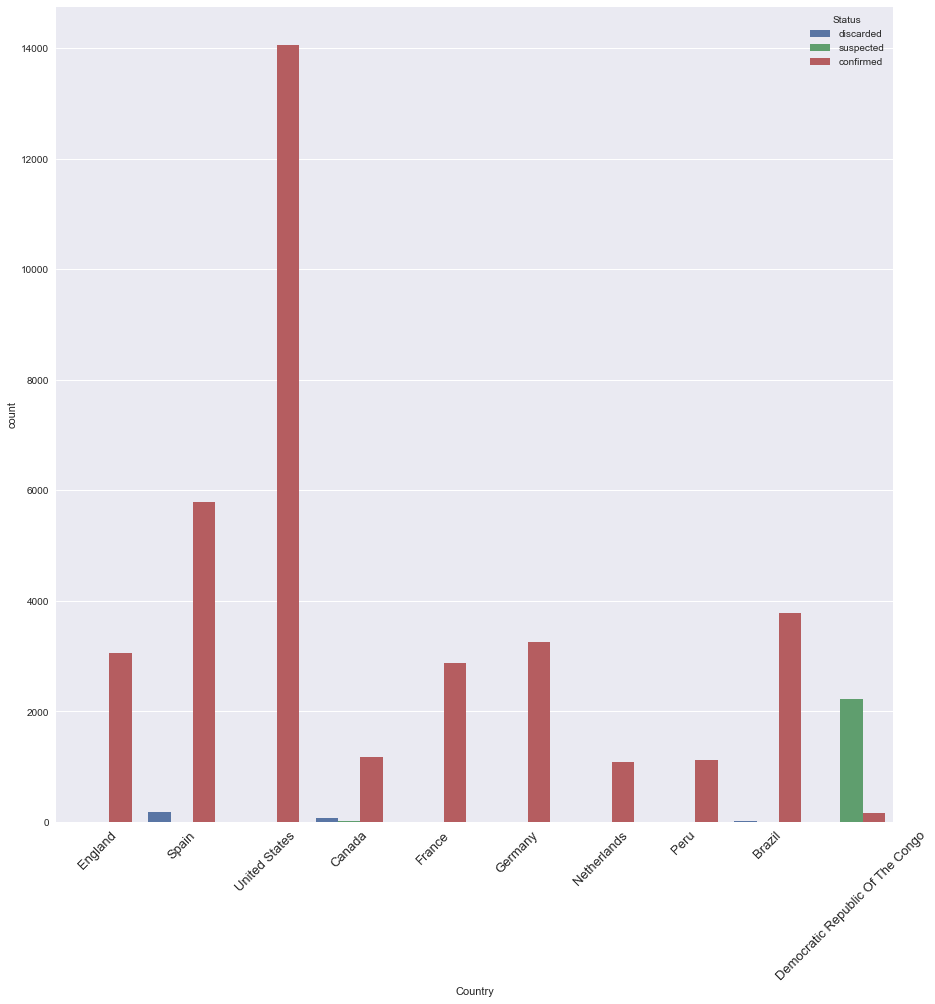

In [19]:
plt.figure(figsize = (15,15))
plt.xticks(rotation = 45, fontsize = 13)
sns.countplot(x = "Country", data = top_10_countries_df, hue = "Status", hue_order = ["discarded", "suspected", "confirmed"])

<AxesSubplot:xlabel='Date_confirmation'>

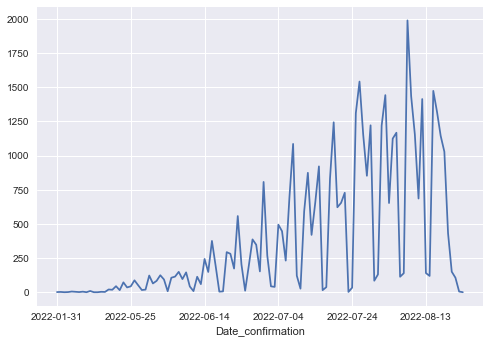

In [20]:
pd.to_datetime(df["Date_confirmation"])
df.groupby("Date_confirmation")["Status"].count().plot(kind = "line")

In [21]:
df.Symptoms.fillna("missing").value_counts()

missing                                               44803
genital ulcer lesions                                    30
oral and genital ulcers, fever                           17
ulcerative lesions                                       16
Rash                                                     13
                                                      ...  
Spots on skin, vesicuated lesions, skin scabs             1
papules, itching, fever, muscle and joint pain            1
papules, itching                                          1
headache, muscle pain, back pain, vasicular rashes        1
fever; rash                                               1
Name: Symptoms, Length: 98, dtype: int64

In [22]:
doc = " ".join(df.Symptoms.fillna("missing"))

In [23]:
Counter(doc.split(" ")).most_common(10)

[('missing', 44803),
 ('lesions', 79),
 ('genital', 53),
 ('skin', 44),
 ('fever,', 36),
 ('fever', 34),
 ('ulcer', 30),
 ('and', 25),
 ('rash', 21),
 ('ulcerative', 21)]

In [24]:
stylecloud.gen_stylecloud(text = doc, size = 655, icon_name = "fas fa-circle", collocations= False,
                         palette = "cartocolors.qualitative.Pastel_5", background_color = "white")